In [241]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [242]:
from google.colab import files
uploaded = files.upload()

Saving crime_data.csv to crime_data (3).csv


In [243]:
raw_data = pd.read_csv('crime_data.csv')

In [244]:
raw_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [245]:
raw_data.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
raw_data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


#Descriptive Statistics

In [246]:
raw_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [247]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [248]:
raw_data.isna().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [249]:
raw_data.duplicated().sum()

0

#EDA

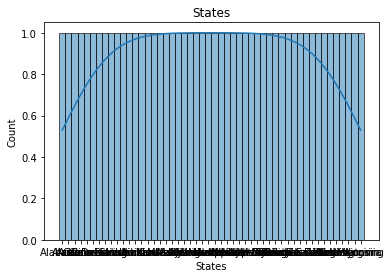

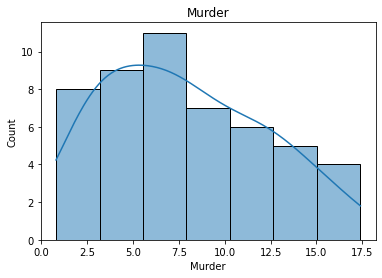

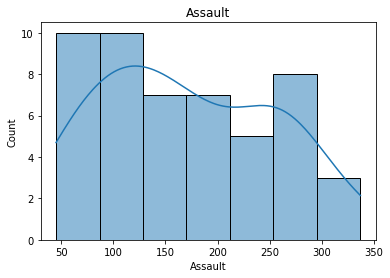

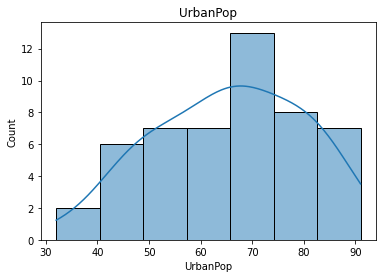

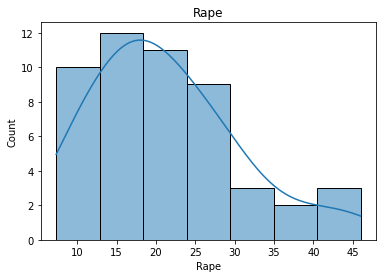

In [250]:
for i in raw_data.columns:
    data = raw_data.copy()
    sns.histplot(data[i],kde=True)
    plt.title(i)
    plt.show()

#Outliers Detection

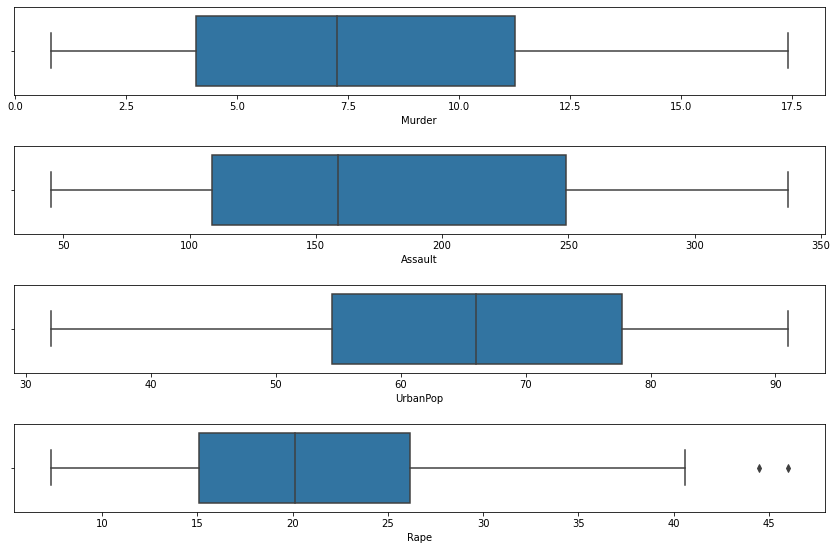

In [251]:
data1 = data.copy() 

fig, axes=plt.subplots(4,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=data1,ax=axes[0])
sns.boxplot(x='Assault',data=data1,ax=axes[1])
sns.boxplot(x='UrbanPop',data=data1,ax=axes[2])
sns.boxplot(x='Rape',data=data1,ax=axes[3])
plt.tight_layout(pad=2.0)
plt.show()

In [252]:
data1 = data[['Murder','Assault','UrbanPop','Rape']]
data1.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

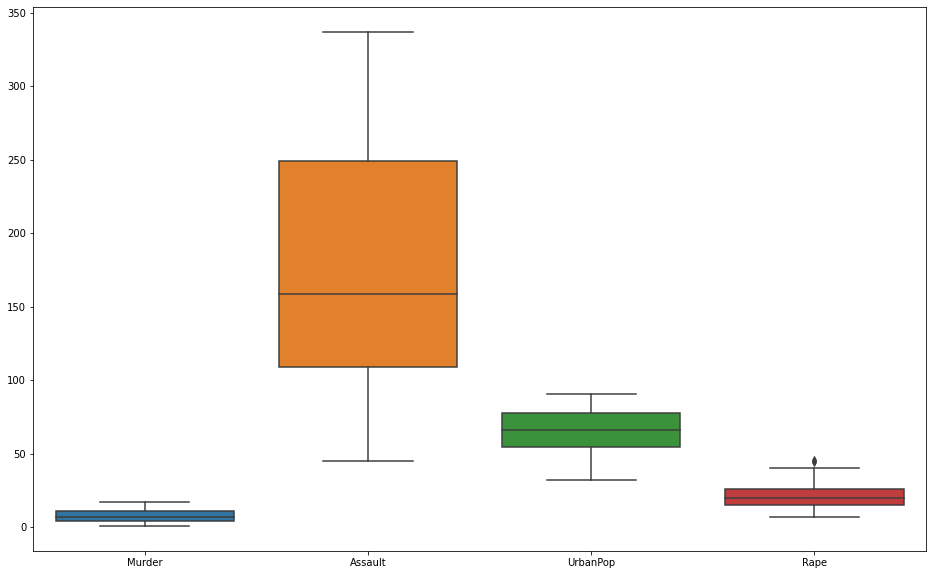

In [253]:
plt.figure(figsize=(16,10))
sns.boxplot(data=data1)
plt.show()

Applying Square Root Tansformation

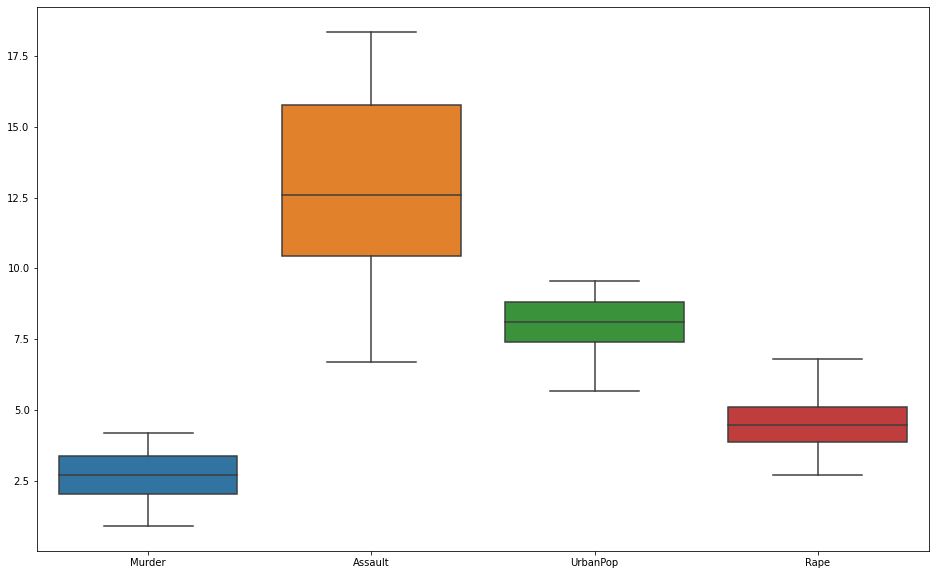

In [254]:
plt.figure(figsize=(16,10))
sns.boxplot(data=np.sqrt(data1))
plt.show()

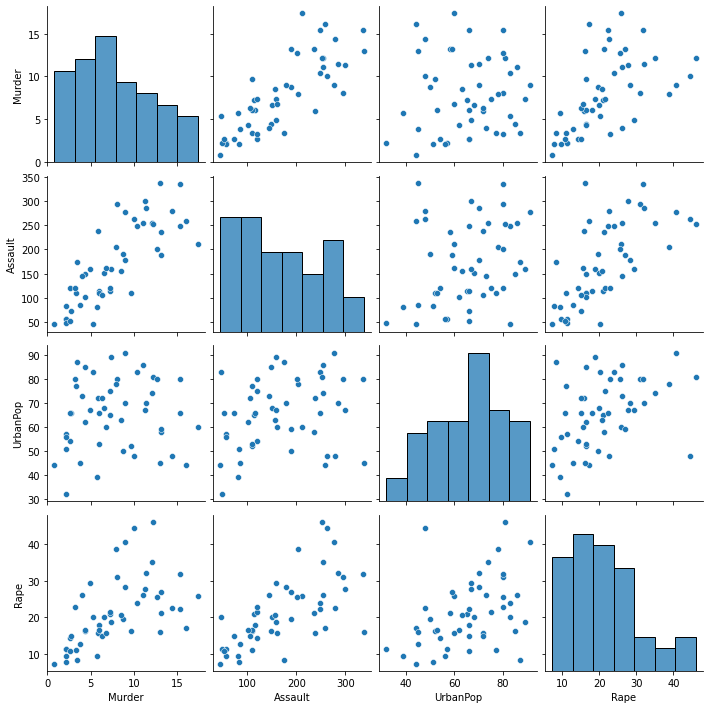

In [255]:
sns.pairplot(data1)

Murder Rate State-wise

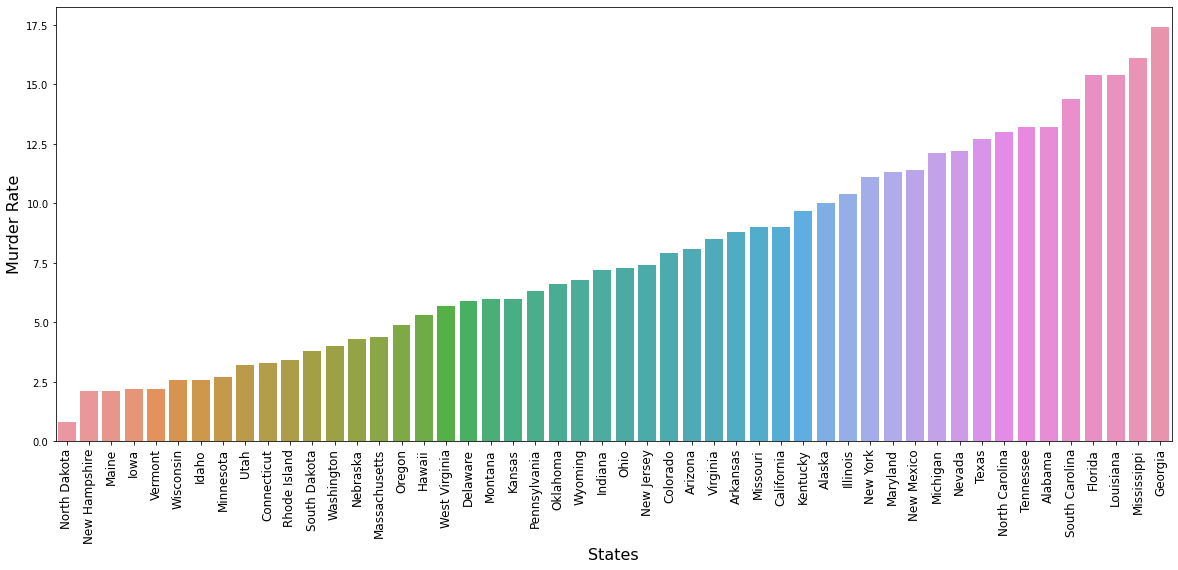

***Top 10 States with Highest Murder Rate***

             States  Murder  Assault  UrbanPop  Rape
9          Georgia    17.4      211        60  25.8
23     Mississippi    16.1      259        44  17.1
8          Florida    15.4      335        80  31.9
17       Louisiana    15.4      249        66  22.2
39  South Carolina    14.4      279        48  22.5
0          Alabama    13.2      236        58  21.2
41       Tennessee    13.2      188        59  26.9
32  North Carolina    13.0      337        45  16.1
42           Texas    12.7      201        80  25.5
27          Nevada    12.2      252        81  46.0 

***Top 10 States with Lowest Murder Rate***

            States  Murder  Assault  UrbanPop  Rape
33   North Dakota     0.8       45        44   7.3
28  New Hampshire     2.1       57        56   9.5
18          Maine     2.1       83        51   7.8
14           Iowa     2.2       56        57  11.3
44        Vermont     2.2       48        32  11.2
48      Wisconsin     2.6  

In [256]:
plt.figure(figsize=(20,8))
sns.barplot(x='States', y='Murder', data=data, order=data.sort_values('Murder').States)
plt.xlabel("States", fontsize = 16)
plt.xticks(rotation = 90, fontsize = 12)
plt.ylabel("Murder Rate", fontsize = 16)
plt.show()

print('***Top 10 States with Highest Murder Rate***\n\n',data.sort_values('Murder',ascending=False).head(10),'\n')
print('***Top 10 States with Lowest Murder Rate***\n\n',data.sort_values('Murder',ascending=True).head(10),'\n')

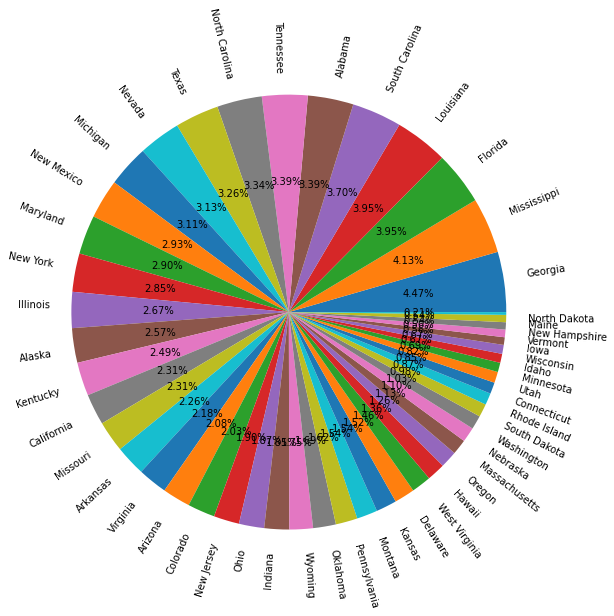

In [257]:
Murder = data.sort_values('Murder', ascending = False)

plt.figure(figsize = (10,10))
plt.pie(Murder.Murder[:],
       labels=Murder.States[:],
       autopct= '%.2f%%', rotatelabels = 90)
plt.show()

Urban Population State-wise

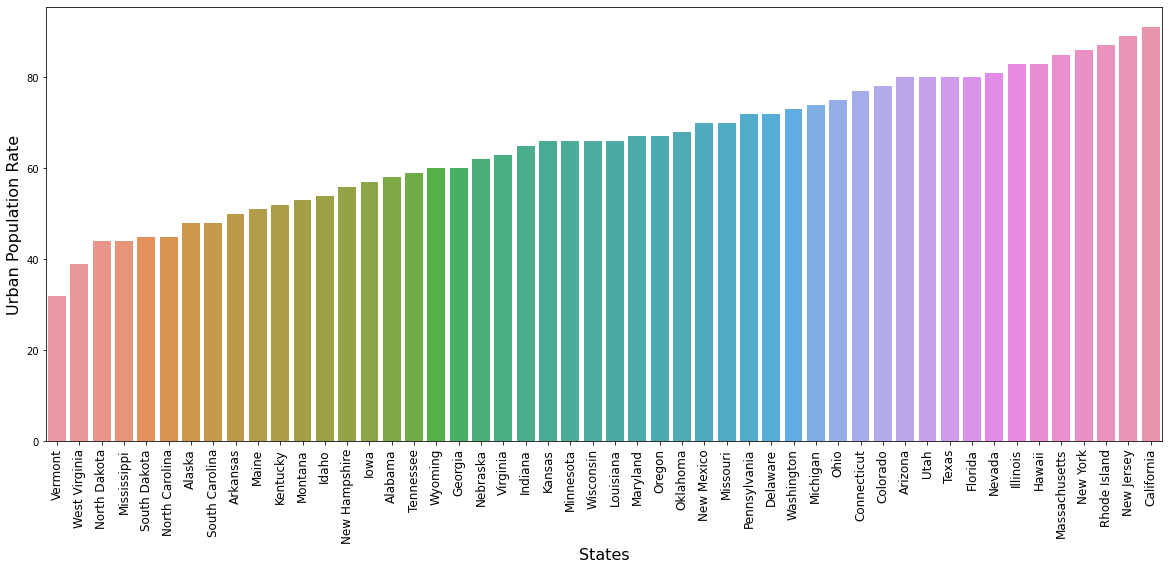

***Top 10 States with Highest Urban Population Rate***

            States  Murder  Assault  UrbanPop  Rape
4      California     9.0      276        91  40.6
29     New Jersey     7.4      159        89  18.8
38   Rhode Island     3.4      174        87   8.3
31       New York    11.1      254        86  26.1
20  Massachusetts     4.4      149        85  16.3
10         Hawaii     5.3       46        83  20.2
12       Illinois    10.4      249        83  24.0
27         Nevada    12.2      252        81  46.0
42          Texas    12.7      201        80  25.5
2         Arizona     8.1      294        80  31.0 

***Top 10 States with Lowest Urban Population Rate***

             States  Murder  Assault  UrbanPop  Rape
44         Vermont     2.2       48        32  11.2
47   West Virginia     5.7       81        39   9.3
33    North Dakota     0.8       45        44   7.3
23     Mississippi    16.1      259        44  17.1
40    South Dakota     3.8       86        45  12.8
32  North Ca

In [258]:
plt.figure(figsize=(20,8))
sns.barplot(x='States', y='UrbanPop', data=data, order=data.sort_values('UrbanPop').States)
plt.xlabel("States", fontsize = 16)
plt.xticks(rotation = 90, fontsize = 12)
plt.ylabel("Urban Population Rate", fontsize = 16)
plt.show()

print('***Top 10 States with Highest Urban Population Rate***\n\n',data.sort_values('UrbanPop',ascending=False).head(10),'\n')
print('***Top 10 States with Lowest Urban Population Rate***\n\n',data.sort_values('UrbanPop',ascending=True).head(10),'\n')

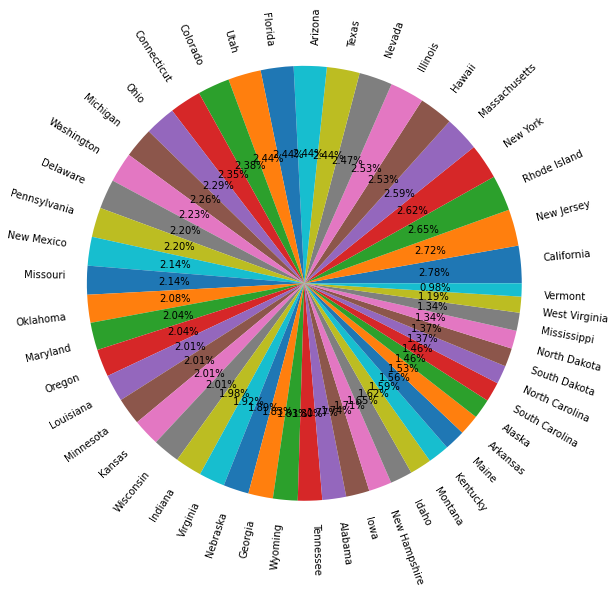

In [259]:
UrbanPop = data.sort_values('UrbanPop', ascending = False)

plt.figure(figsize = (10,10))
plt.pie(UrbanPop.UrbanPop[:],
       labels=UrbanPop.States[:],
       autopct= '%.2f%%', rotatelabels = 90)
plt.show()

Assault State-wise

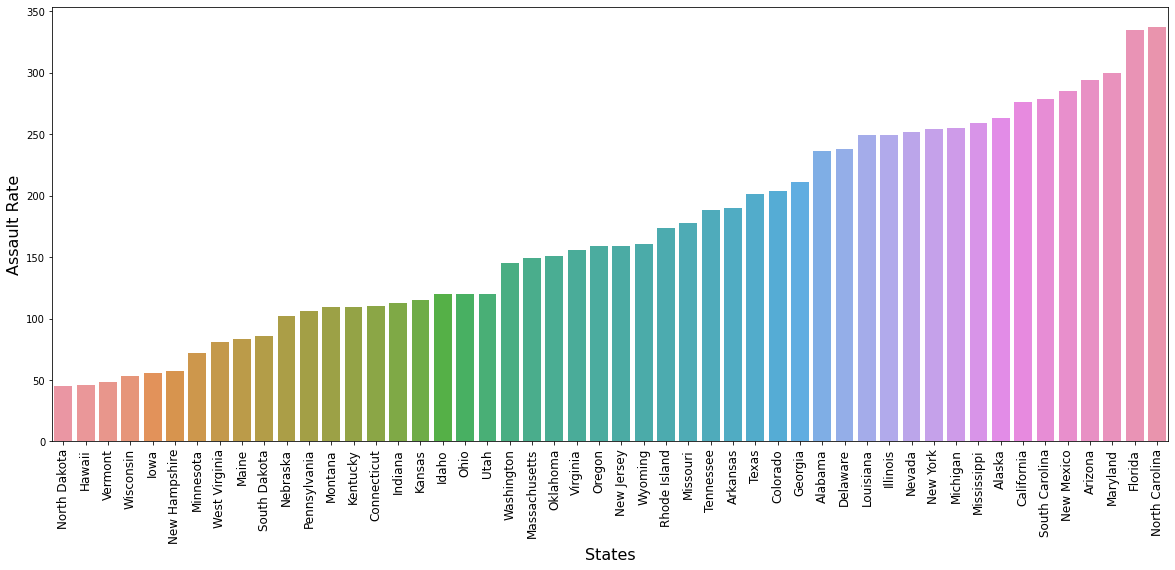

***Top 10 States with Highest Assault Rate***

             States  Murder  Assault  UrbanPop  Rape
32  North Carolina    13.0      337        45  16.1
8          Florida    15.4      335        80  31.9
19        Maryland    11.3      300        67  27.8
2          Arizona     8.1      294        80  31.0
30      New Mexico    11.4      285        70  32.1
39  South Carolina    14.4      279        48  22.5
4       California     9.0      276        91  40.6
1           Alaska    10.0      263        48  44.5
23     Mississippi    16.1      259        44  17.1
21        Michigan    12.1      255        74  35.1 

***Top 10 States with Lowest Assault Rate***

            States  Murder  Assault  UrbanPop  Rape
33   North Dakota     0.8       45        44   7.3
10         Hawaii     5.3       46        83  20.2
44        Vermont     2.2       48        32  11.2
48      Wisconsin     2.6       53        66  10.8
14           Iowa     2.2       56        57  11.3
28  New Hampshire     2.1

In [260]:
plt.figure(figsize=(20,8))
sns.barplot(x='States', y='Assault', data=data, order=data.sort_values('Assault').States)
plt.xlabel("States", fontsize = 16)
plt.xticks(rotation = 90, fontsize = 12)
plt.ylabel("Assault Rate", fontsize = 16)
plt.show()

print('***Top 10 States with Highest Assault Rate***\n\n',data.sort_values('Assault',ascending=False).head(10),'\n')
print('***Top 10 States with Lowest Assault Rate***\n\n',data.sort_values('Assault',ascending=True).head(10),'\n')

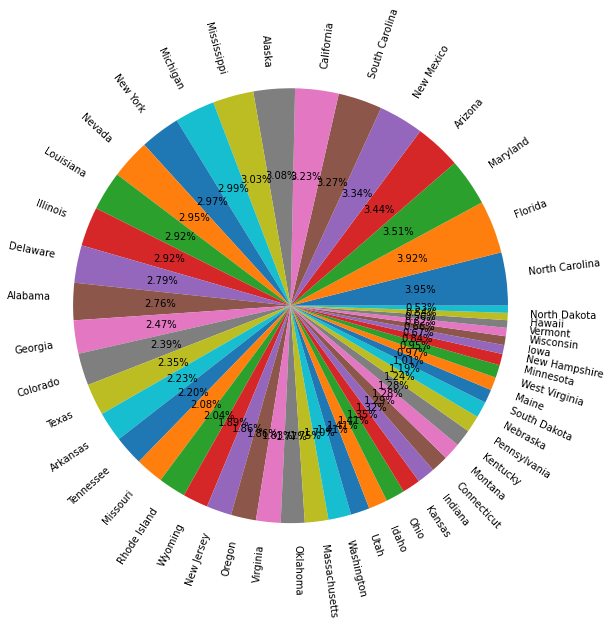

In [261]:
Assault = data.sort_values('Assault', ascending = False)

plt.figure(figsize = (10,10))
plt.pie(Assault.Assault[:],
       labels=Assault.States[:],
       autopct= '%.2f%%', rotatelabels = 90)
plt.show()

Rape State-wise

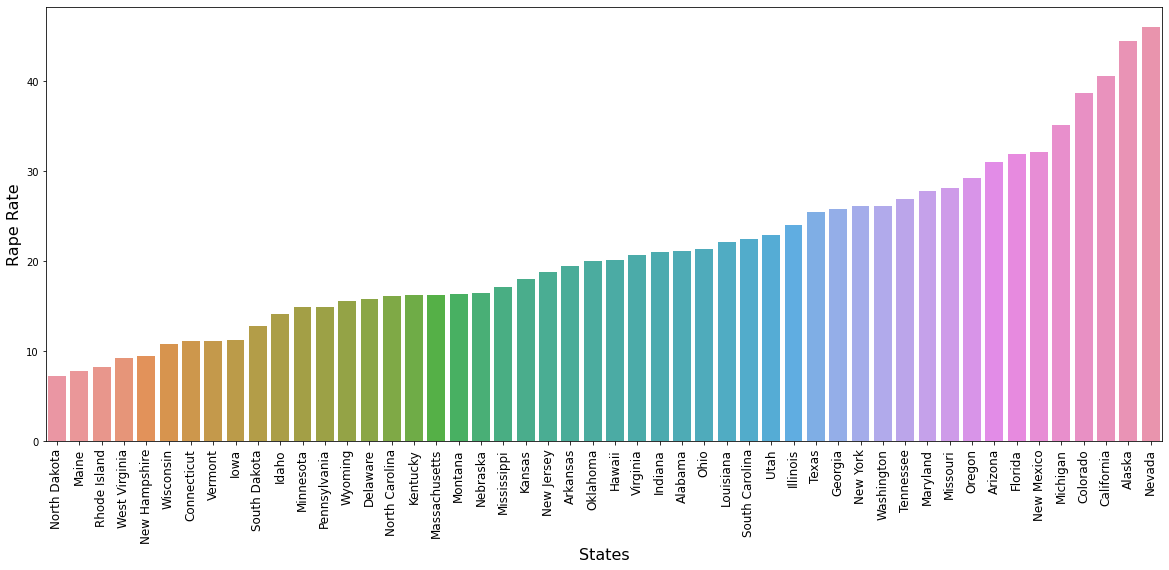

***Top 10 States with Highest Rape Rate***

         States  Murder  Assault  UrbanPop  Rape
27      Nevada    12.2      252        81  46.0
1       Alaska    10.0      263        48  44.5
4   California     9.0      276        91  40.6
5     Colorado     7.9      204        78  38.7
21    Michigan    12.1      255        74  35.1
30  New Mexico    11.4      285        70  32.1
8      Florida    15.4      335        80  31.9
2      Arizona     8.1      294        80  31.0
36      Oregon     4.9      159        67  29.3
24    Missouri     9.0      178        70  28.2 

***Top 10 States with Lowest Rape Rate***

            States  Murder  Assault  UrbanPop  Rape
33   North Dakota     0.8       45        44   7.3
18          Maine     2.1       83        51   7.8
38   Rhode Island     3.4      174        87   8.3
47  West Virginia     5.7       81        39   9.3
28  New Hampshire     2.1       57        56   9.5
48      Wisconsin     2.6       53        66  10.8
6     Connecticut     3.

In [262]:
plt.figure(figsize=(20,8))
sns.barplot(x='States', y='Rape', data=data, order=data.sort_values('Rape').States)
plt.xlabel("States", fontsize = 16)
plt.xticks(rotation = 90, fontsize = 12)
plt.ylabel("Rape Rate", fontsize = 16)
plt.show()

print('***Top 10 States with Highest Rape Rate***\n\n',data.sort_values('Rape',ascending=False).head(10),'\n')
print('***Top 10 States with Lowest Rape Rate***\n\n',data.sort_values('Rape',ascending=True).head(10),'\n')

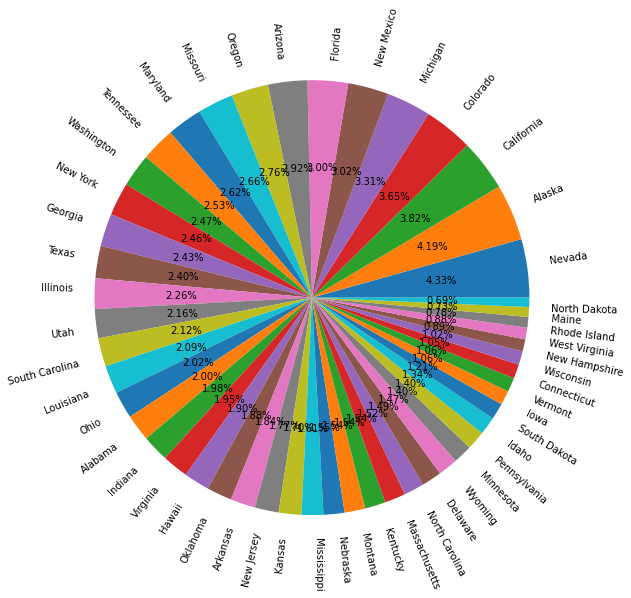

In [263]:
Rape = data.sort_values('Rape', ascending = False)

plt.figure(figsize = (10,10))
plt.pie(Rape.Rape[:],
       labels=Rape.States[:],
       autopct= '%.2f%%', rotatelabels = 90)
plt.show()

#Data Featurizing

In [264]:
# Make 'State' as index of our dataframe
data1 = data.set_index('States')
data1.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


**1) Standardize our Data**

In [265]:
data_std = StandardScaler().fit_transform(data1)
data_std.shape

(50, 4)

**2) Normalize our Data**

In [266]:
data_nor = StandardScaler().fit_transform(data1)
data_nor.shape

(50, 4)

#KMeans Clustering

**1) For our Standardized data**

In [267]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2).fit(data_std)
    wcss.append(kmeans.inertia_)

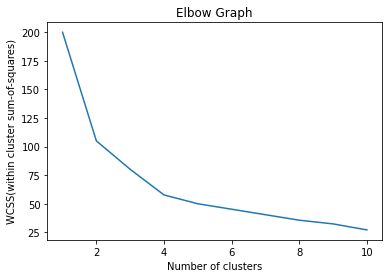

In [268]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS(within cluster sum-of-squares)')
plt.show()

**2) For our Normalized data**

In [269]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2).fit(data_nor)
    wcss.append(kmeans.inertia_)

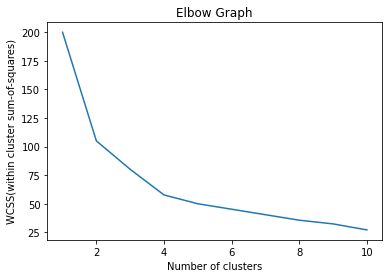

In [270]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS(within cluster sum-of-squares)')
plt.show()

KMeans for 2 clusters

In [271]:
# Cluster algorithm using K=2
c2 = KMeans(2,random_state=0).fit(data_std)
c2.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [272]:
c2.inertia_

104.96163315756871

In [273]:
data2 = data.copy()
data2['clusters2id']=c2.labels_
data2.head()

,States,Murder,Assault,UrbanPop,Rape,clusters2id
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [274]:
data2.groupby('clusters2id').agg(['mean']).reset_index()

,clusters2id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.870,114.433333,63.633333,15.943333
1,1,12.165,255.250000,68.400000,29.165000


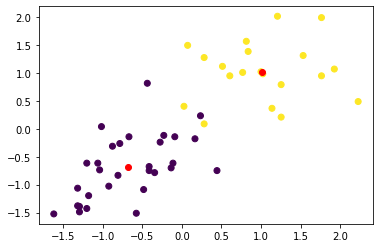

In [275]:
plt.scatter(data_std[:,0], data_std[:,1], c = c2.labels_)

centers = c2.cluster_centers_                                 
# We want to create 2 centers and show them on the visual.

plt.scatter(centers[:,0], centers[:,1], c = "red")

KMeans for 3 clusters

In [276]:
# Cluster algorithm using K=3
c3 = KMeans(3,random_state=0).fit(data_std)
c3.labels_

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [277]:
c3.inertia_

80.0888613219962

In [278]:
data3 = data.copy()
data3['clusters3id']=c3.labels_
data3.head()

,States,Murder,Assault,UrbanPop,Rape,clusters3id
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


In [279]:
data3.groupby('clusters3id').agg(['mean']).reset_index()

,clusters3id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923
1,1,12.331579,259.315789,68.315789,29.215789
2,2,6.016667,143.888889,72.333333,19.344444


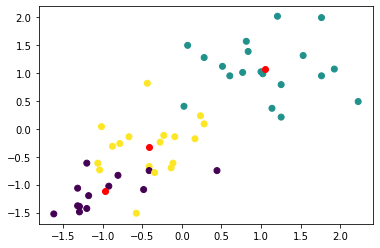

In [280]:
plt.scatter(data_std[:,0], data_std[:,1], c = c3.labels_)

centers = c3.cluster_centers_                                 
# We want to create 2 centers and show them on the visual.

plt.scatter(centers[:,0], centers[:,1], c = "red")

By KMeans clustering we can observe,


1.   Cluster0 is Safe Zone that indicates the group of States with Lowest Crime Rate.
2.   Cluster1 is Danger Zone that indicates the group of States with Highest Crime Rate.





The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.
The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.
The Cities in Cluster-2 seems to have Moderate crime rates and can be regarded as Moderate-Zone

#Hierarchical Clustering

**1) Dendogram for Standarized Data**

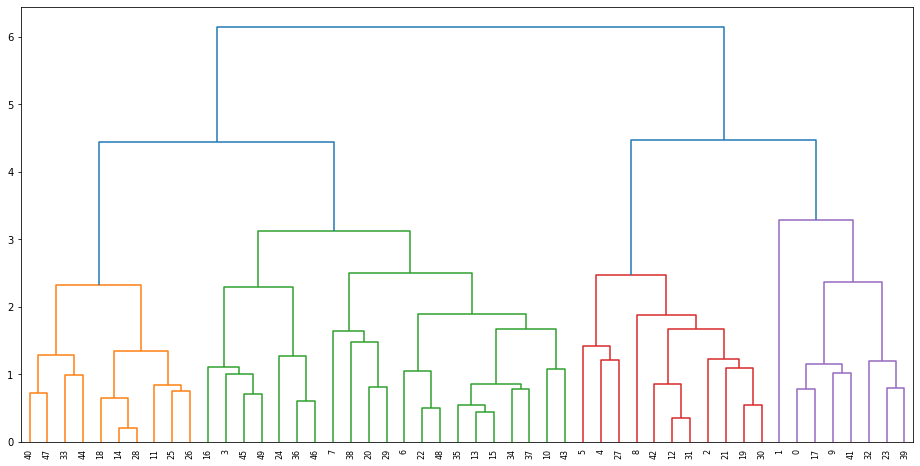

In [281]:
plt.figure(figsize=(16,8))
sch.dendrogram(sch.linkage(data_std, method='complete'))
plt.show()

**2) Dendogram for Normalized Data**

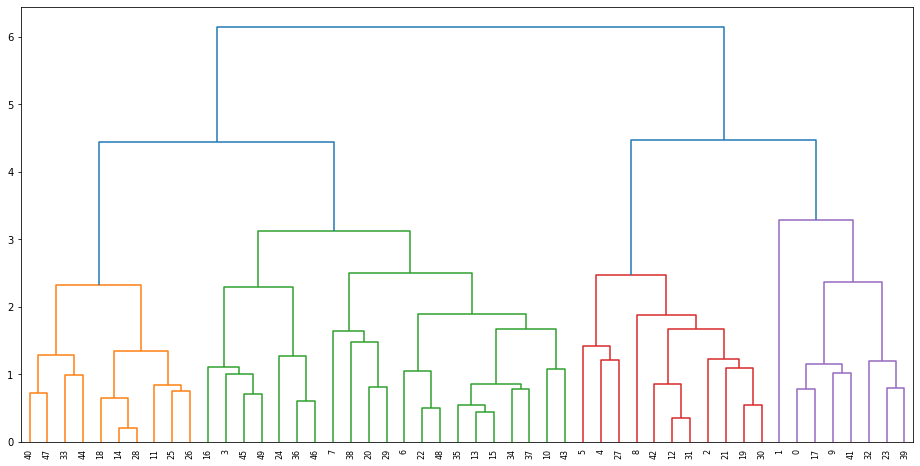

In [282]:
plt.figure(figsize=(16,8))
sch.dendrogram(sch.linkage(data_nor, method='complete'))
plt.show()

Apply PCA

In [283]:
from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df = pca_std.fit_transform(data_std)

In [284]:
print(pca_std.singular_values_)

[11.13607107  7.0347891   4.22234047]


In [285]:
#Agglomerative Clustering

ac = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred = ac.fit_predict(pca_std_df)
print(y_pred.shape)
y_pred

(50,)


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [286]:
data4 = data.copy()
data4['Hierarchical_labels'] = ac.labels_
data4.head()

,States,Murder,Assault,UrbanPop,Rape,Hierarchical_labels
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [287]:
data4.groupby('Hierarchical_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Hierarchical_labels,,,,
0,5.003226,116.483871,63.838710,16.338710
1,12.331579,259.315789,68.315789,29.215789


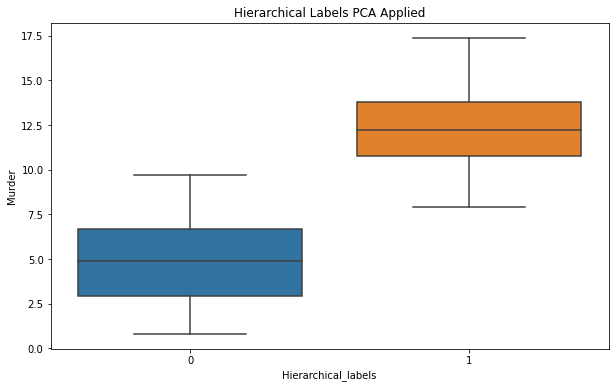

In [288]:
plt.subplots(figsize=(10, 6))
sns.boxplot(x='Hierarchical_labels', y='Murder', data=data4)
plt.title('Hierarchical Labels PCA Applied')
plt.show()

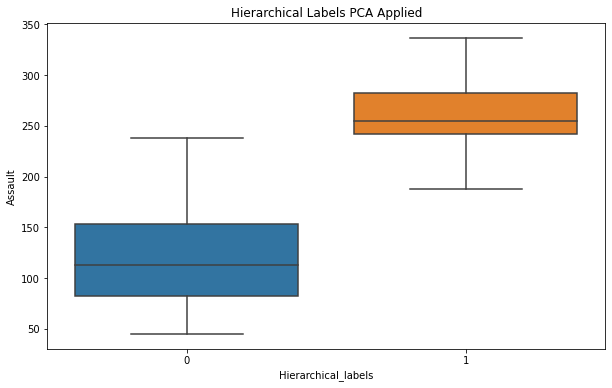

In [289]:
plt.subplots(figsize=(10, 6))
sns.boxplot(x='Hierarchical_labels', y='Assault', data=data4)
plt.title('Hierarchical Labels PCA Applied')
plt.show()

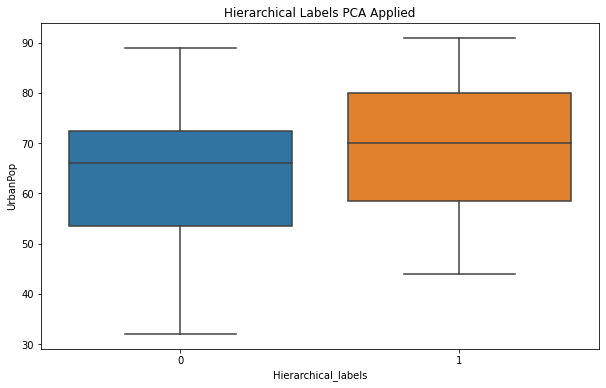

In [290]:
plt.subplots(figsize=(10, 6))
sns.boxplot(x='Hierarchical_labels', y='UrbanPop', data=data4)
plt.title('Hierarchical Labels PCA Applied')
plt.show()

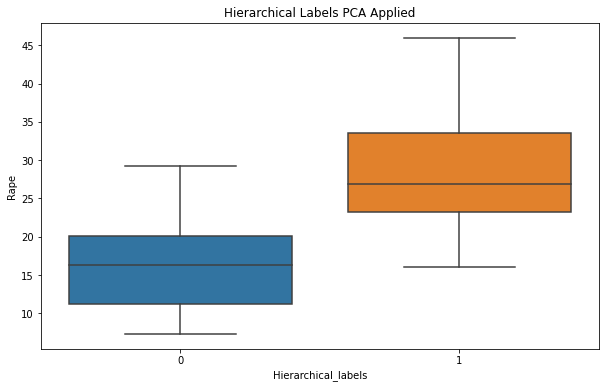

In [291]:
plt.subplots(figsize=(10, 6))
sns.boxplot(x='Hierarchical_labels', y='Rape', data=data4)
plt.title('Hierarchical Labels PCA Applied')
plt.show()

**From Hierarchial Clustering we can observe,**

1.   Cities in the Cluster-0 are Safe-Zone as crime rate is less.
2.   Cities in the Cluster-1 are Danger-Zone as crime rate is more.



#DBSCAN - (Density Based Spatial Clustering of Applications with Noise)

In [292]:
data5 = data1.copy()

array = data5.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [293]:
X = StandardScaler().fit_transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

DBSCAN for eps=3 & min_samples=3

In [294]:
dbscan = DBSCAN(eps=3, min_samples=3)
dbscan.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [295]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [296]:
data5['DBSCAN_labels'] = dbscan.labels_
data5.groupby('DBSCAN_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
DBSCAN_labels,,,,
0,7.788,170.76,65.54,21.232


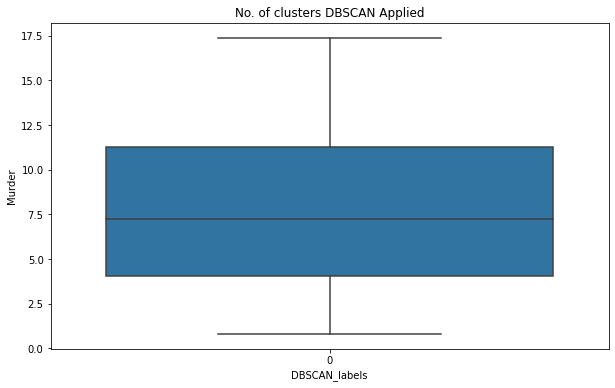

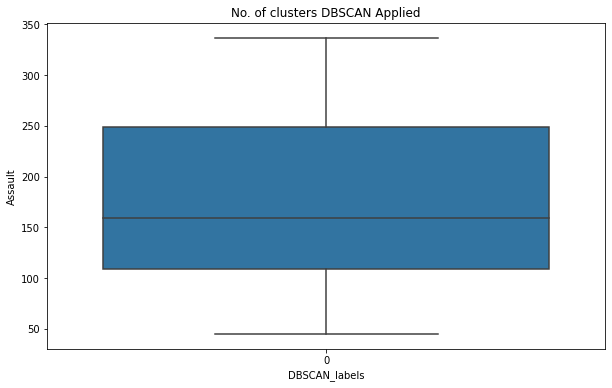

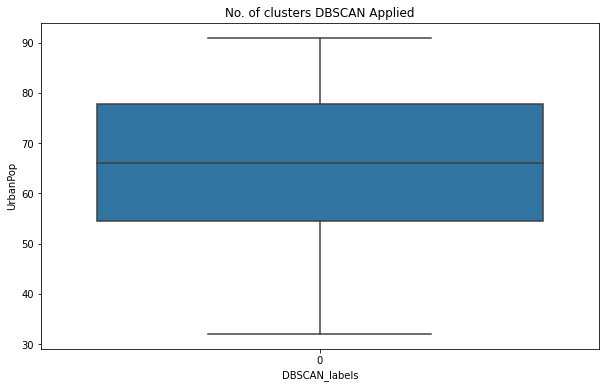

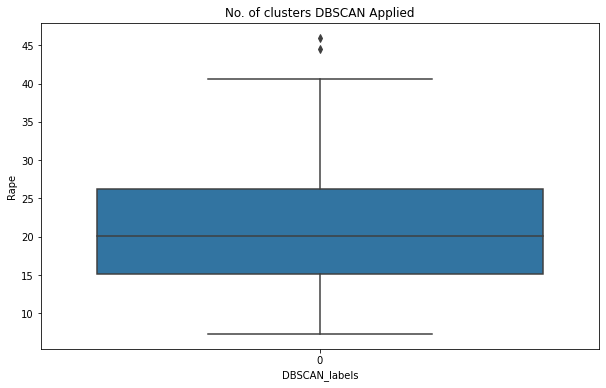

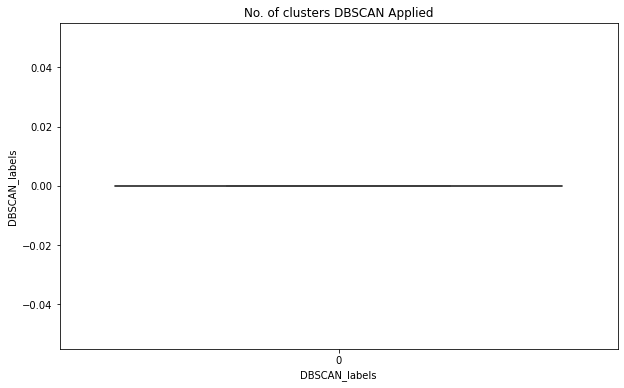

In [297]:
for i in data5.columns:
    plt.subplots(figsize=(10, 6))
    sns.boxplot(x='DBSCAN_labels', y=data5[i], data=data5)
    plt.title('No. of clusters DBSCAN Applied')
    plt.show()

DBSCAN for eps=1.5 & min_samples=1


In [298]:
dbscan = DBSCAN(eps=1.5, min_samples=1)
dbscan.fit_predict(X)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [299]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [300]:
data5['DBSCAN_labels'] = dbscan.labels_
data5.groupby('DBSCAN_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
DBSCAN_labels,,,,
0,7.742857,168.877551,65.897959,20.757143
1,10.000000,263.000000,48.000000,44.500000


In [301]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(data5.loc[data5.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(data5.loc[data5.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [302]:
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg
Murder,7.742857,10.0
Assault,168.877551,263.0
UrbanPop,65.897959,48.0
Rape,20.757143,44.5
DBSCAN_labels,0.000000,1.0


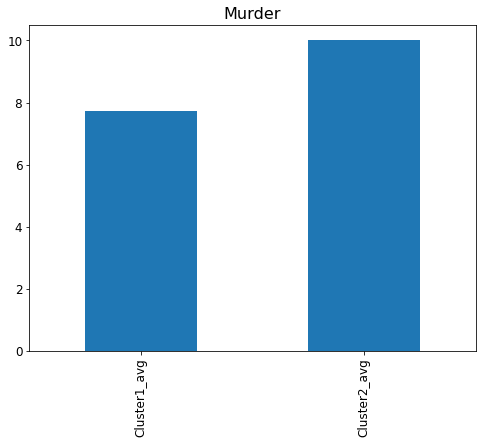

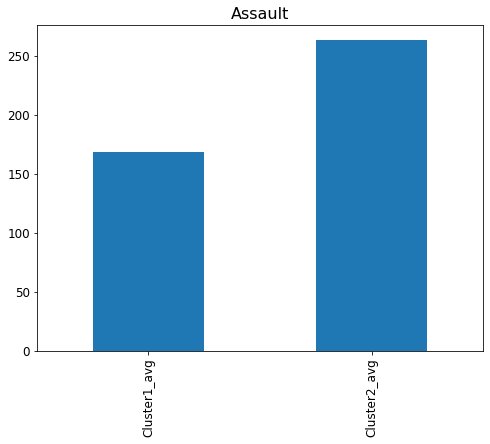

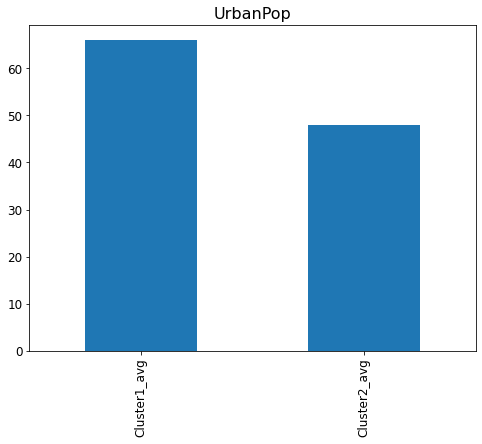

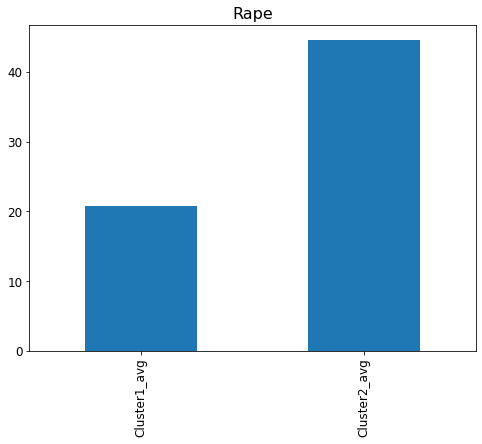

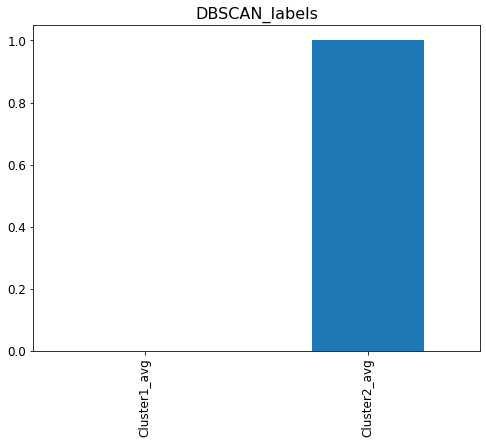

In [303]:
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16)
    j.plot(kind='bar',fontsize=12)
    plt.show()

DBSCAN for eps=1.4 & min_samples=1

In [304]:
dbscan = DBSCAN(eps=1.4, min_samples=1)
dbscan.fit(X)

DBSCAN(eps=1.4, min_samples=1)

In [305]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [306]:
data5['DBSCAN_labels'] = dbscan.labels_
data5.groupby('DBSCAN_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
DBSCAN_labels,,,,
0,7.742857,168.877551,65.897959,20.757143
1,10.000000,263.000000,48.000000,44.500000


In [307]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(data5.loc[data5.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(data5.loc[data5.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [308]:
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg
Murder,7.742857,10.0
Assault,168.877551,263.0
UrbanPop,65.897959,48.0
Rape,20.757143,44.5
DBSCAN_labels,0.000000,1.0


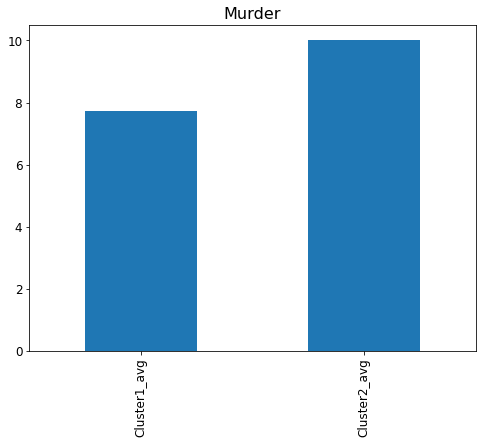

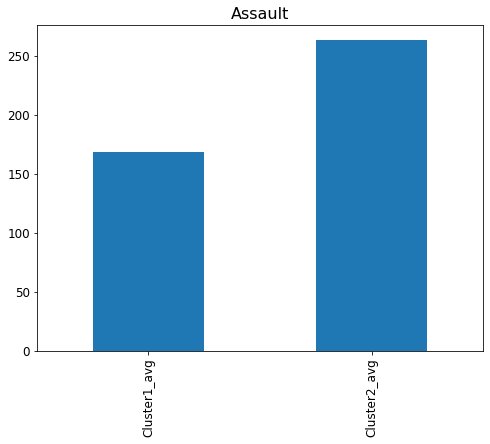

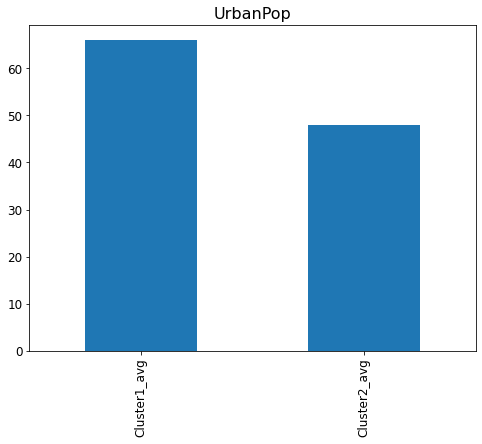

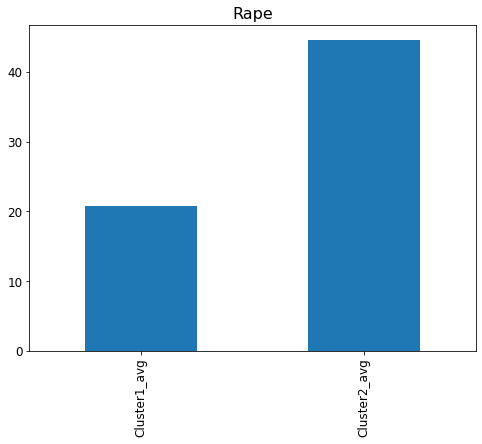

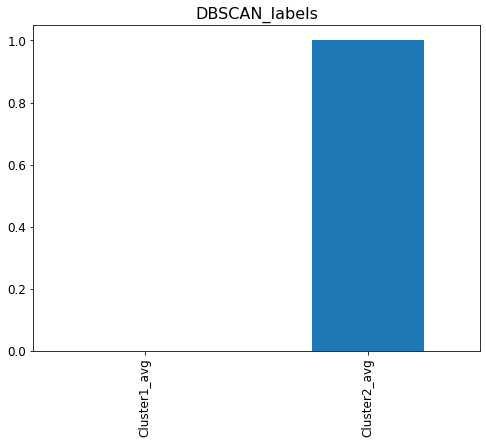

In [309]:
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16)
    j.plot(kind='bar',fontsize=12)
    plt.show()

**From DBSCAN Clustering we can observe,**

1.   Cities in Cluster-0 are Safe-Zone as crime rate is less.
2.   Cities in Cluster-1 are Danger-Zone as crime rate is more.



#Conclusion

**Hence we conclude that,**

1.   Cities in the Cluster-0 are Safe-Zone as crime rate is less.
2.   Cities in the Cluster-1 are Moderate-Zone as crime rate is moderate.
3.   Cities in the Cluster-2 are Danger-Zone as crime rate is more.

